## Exploratory Data Analysis

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Correlation Analysis

+ Calculating the Correlation with the Target Column which is `failure`

+ `Vibration Level (0.021784)` : The correlation with failure is very close to zero, indicating a very weak linear relationship. Vibration levels don't significantly impact the likelihood of failure based on this data.

+ `Temperature (0.052382)` : The correlation with failure is also very close to zero, suggesting a weak linear relationship. Temperature appears to have little effect on the failure probability in this dataset.

+ `Pressure (0.235530)` : The positive correlation suggests that as the pressure increases, the probability of failure tends to increase. While not a strong correlation, it is notable compared to other features and might indicate that higher pressure could be associated with an increased risk of failure.

+ `Flow Rate (-0.274590)` : The negative correlation indicates that as the flow rate increases, the likelihood of failure decreases. This suggests that higher flow rates are associated with a lower probability of failure, though this relationship is also not very strong.

+ Correlation only calculates the Linear Relationships between the feature and target.

In [6]:
## read the data
## read data using pandas
pump_data = pd.read_csv('hypothetical_pump_failure_dataset.csv')
## make the column timestamp to date time format and make the column as index
pump_data['timestamp'] = pd.to_datetime(pump_data['timestamp'])
pump_data.set_index('timestamp', inplace=True)
pump_data.head()

,vibration_level,temperature_C,pressure_PSI,flow_rate_m3h,failure
timestamp,,,,,
2024-01-01 00:00:00,0.549671,76.996777,93.248217,40.460962,0
2024-01-01 01:00:00,0.486174,74.623168,98.554813,45.698075,0
2024-01-01 02:00:00,0.564769,70.298152,92.075801,47.931972,0
2024-01-01 03:00:00,0.652303,66.765316,96.920385,59.438438,0
2024-01-01 04:00:00,0.476585,73.491117,81.063853,52.782766,0


In [7]:
df_corr = pump_data.corr()
## correlation with the failure
correlation_with_failure = df_corr['failure']

print(correlation_with_failure)

vibration_level    0.021784
temperature_C      0.052382
pressure_PSI       0.235530
flow_rate_m3h     -0.274590
failure            1.000000
Name: failure, dtype: float64


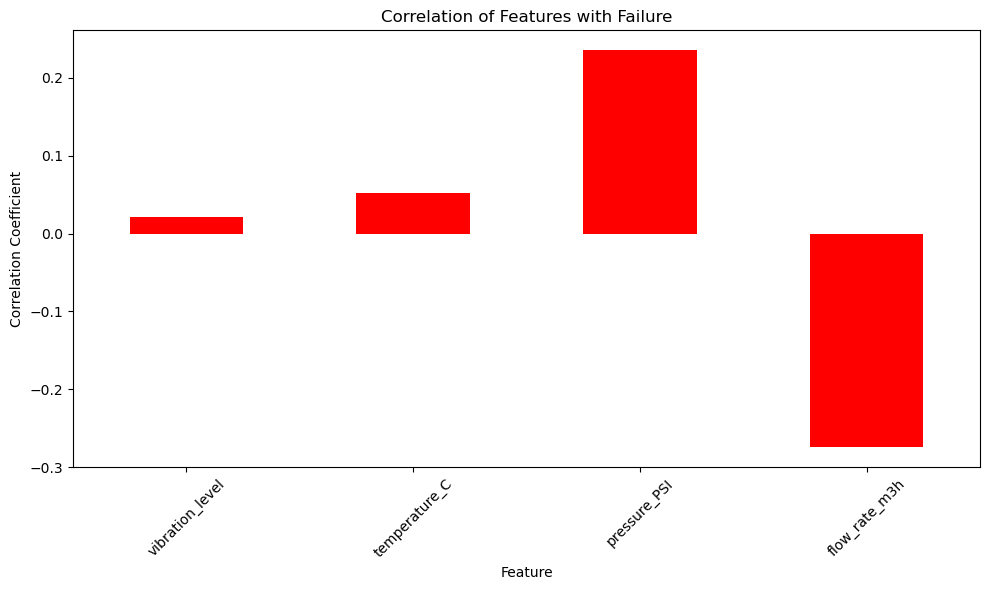

In [8]:
## plot
# Plot correlation with failure
plt.figure(figsize=(10, 6))
correlation_with_failure.drop('failure').plot(kind='bar', color='red')
plt.title('Correlation of Features with Failure')
plt.xlabel('Feature')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

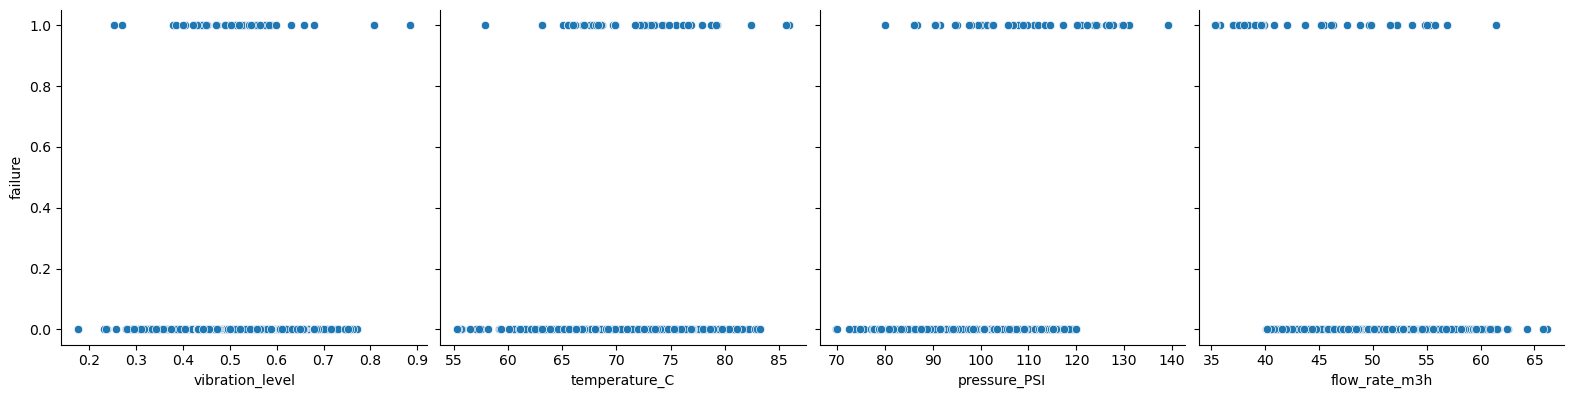

In [20]:
## checking for the non linear patterns in the data using scatter plots
sns.pairplot(pump_data, x_vars=['vibration_level', 'temperature_C', 'pressure_PSI', 'flow_rate_m3h'], y_vars='failure', height=4, aspect=1, kind='scatter')
plt.show()

**Scatter Plot Interpretation for Non-Linear Patterns**

The scatter plots you have generated display the relationship between each feature (vibration level, temperature, pressure, flow rate) and the target variable (failure). Here’s how to interpret the plots:

+ Vibration Level vs. Failure:

Observation: The data points are mostly concentrated at the failure (0) and non-failure (1) points, with no clear pattern between vibration levels and failures. The distribution seems uniform across the x-axis, indicating no strong non-linear relationship.

Conclusion: Vibration levels do not appear to have a significant non-linear relationship with failures.

+ Temperature vs. Failure:

Observation: Similar to vibration level, the data points for temperature are spread across the x-axis without a distinct pattern. Failures occur across various temperature ranges, indicating no strong non-linear relationship.

Conclusion: Temperature does not show a clear non-linear relationship with failure events in the scatter plot.

+ Pressure vs. Failure:

Observation: The plot shows a slightly more clustered distribution, particularly at the higher end of the pressure range. However, the pattern is still not definitive enough to suggest a strong non-linear relationship.

Conclusion: While there might be some clustering at higher pressures, the scatter plot does not provide strong evidence of a non-linear relationship between pressure and failure.

+ Flow Rate vs. Failure:

Observation: The data points for flow rate also appear to be evenly distributed across failure and non-failure events, with no clear pattern or clustering indicating a non-linear relationship.

Conclusion: The flow rate does not exhibit a significant non-linear relationship with failures.
Overall Insights
From these scatter plots, it can be concluded that there is no strong non-linear relationship between the features and the target variable (failure). This suggests that more complex modeling techniques, such as decision trees or neural networks, might not capture additional relationships beyond what can be achieved with simpler linear models. However, further analysis or feature engineering might still reveal underlying patterns.

#### Feature Data Distribution

+ Checking the Feature data distrubution by Histograms and Boxplots

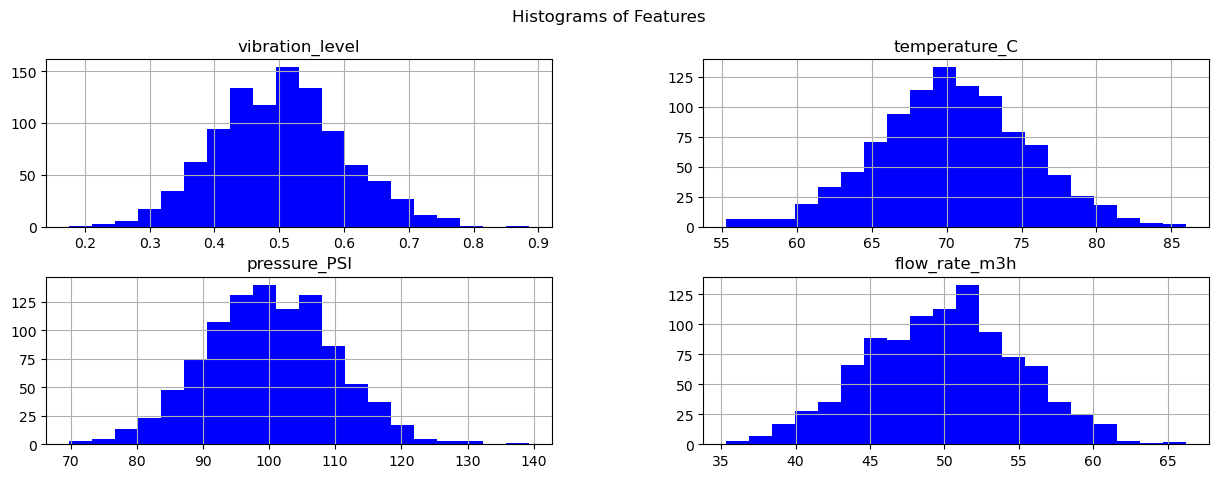

In [22]:
# histograms
pump_data[['vibration_level', 'temperature_C', 'pressure_PSI', 'flow_rate_m3h']].hist(bins=20, figsize=(15, 5), color='blue')
plt.suptitle('Histograms of Features')
plt.show()

**Distribution Analysis Using Histograms**

The histograms provide an overview of the distribution of each feature, helping to understand the variability and operational range within the dataset:

+ Vibration Level: Shows a roughly normal distribution centered around 0.5, indicating stable operations with consistent vibration levels and few extreme values.
+ Temperature (°C): Also follows a normal distribution around 70°C, with most readings between 60°C and 80°C, suggesting controlled temperature fluctuations during operation.
+ Pressure (PSI): Displays a normal distribution centered around 100 PSI, with values ranging from 70 to 140 PSI, reflecting moderate variability in operating pressure.
+ Flow Rate (m³/h): Exhibits a normal distribution around 50 m³/h, with most readings between 35 and 65 m³/h, indicating consistent flow performance with minimal extreme values.


Conclusion:
All features demonstrate approximately normal distributions, suggesting that the pump operates under stable conditions most of the time. Deviations from these central values may indicate potential anomalies or precursors to pump failures.lures.


<Figure size 1000x600 with 0 Axes>

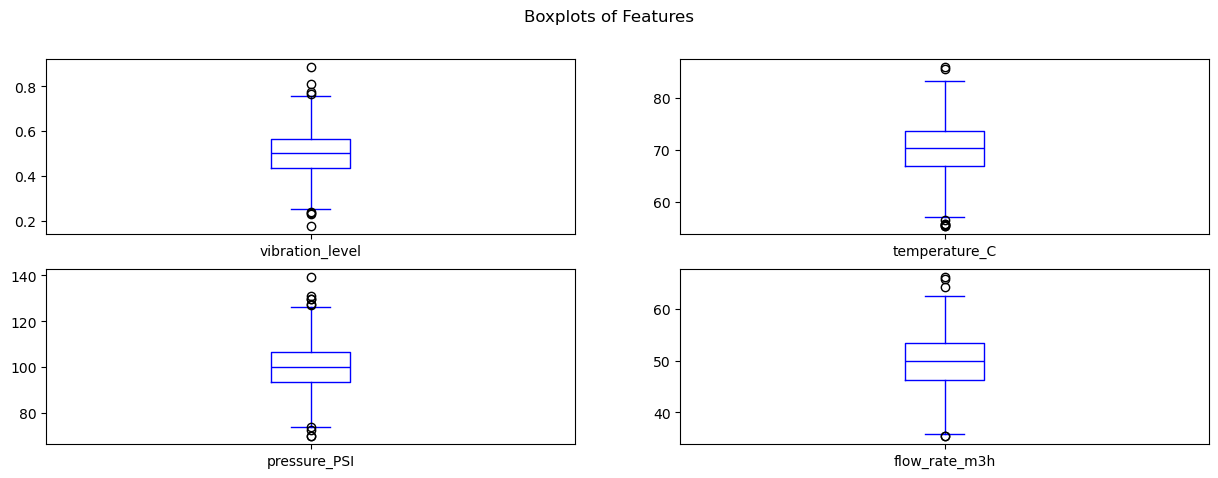

In [23]:
## boxplots
plt.figure(figsize=(10, 6))
pump_data[['vibration_level', 'temperature_C', 'pressure_PSI', 'flow_rate_m3h']].plot(kind='box', subplots=True, layout=(2, 2), sharex=False, sharey=False, figsize=(15, 5), color='blue')
plt.suptitle('Boxplots of Features')
plt.show()

**Outlier Detection Using Boxplots**

The boxplots highlight potential outliers across the dataset:

+ Vibration Level: A few outliers are detected above 0.8 and below 0.2, suggesting rare or unusual vibration conditions.
+ Temperature (°C): Outliers appear below 60°C and above 80°C, potentially indicating abnormal cooling or overheating events.
+ Pressure (PSI): Outliers above 130 PSI suggest high-pressure conditions that could stress the pump.
+ Flow Rate (m³/h): Outliers below 40 and above 60 m³/h may indicate flow inefficiencies or blockages.


Conclusion:
The presence of outliers in each feature suggests potential indicators of abnormal pump behavior. Investigating these outliers could provide insights into conditions that may lead to failures.

#### Time Series Analysis

In [9]:
pump_data.head()

,vibration_level,temperature_C,pressure_PSI,flow_rate_m3h,failure
timestamp,,,,,
2024-01-01 00:00:00,0.549671,76.996777,93.248217,40.460962,0
2024-01-01 01:00:00,0.486174,74.623168,98.554813,45.698075,0
2024-01-01 02:00:00,0.564769,70.298152,92.075801,47.931972,0
2024-01-01 03:00:00,0.652303,66.765316,96.920385,59.438438,0
2024-01-01 04:00:00,0.476585,73.491117,81.063853,52.782766,0


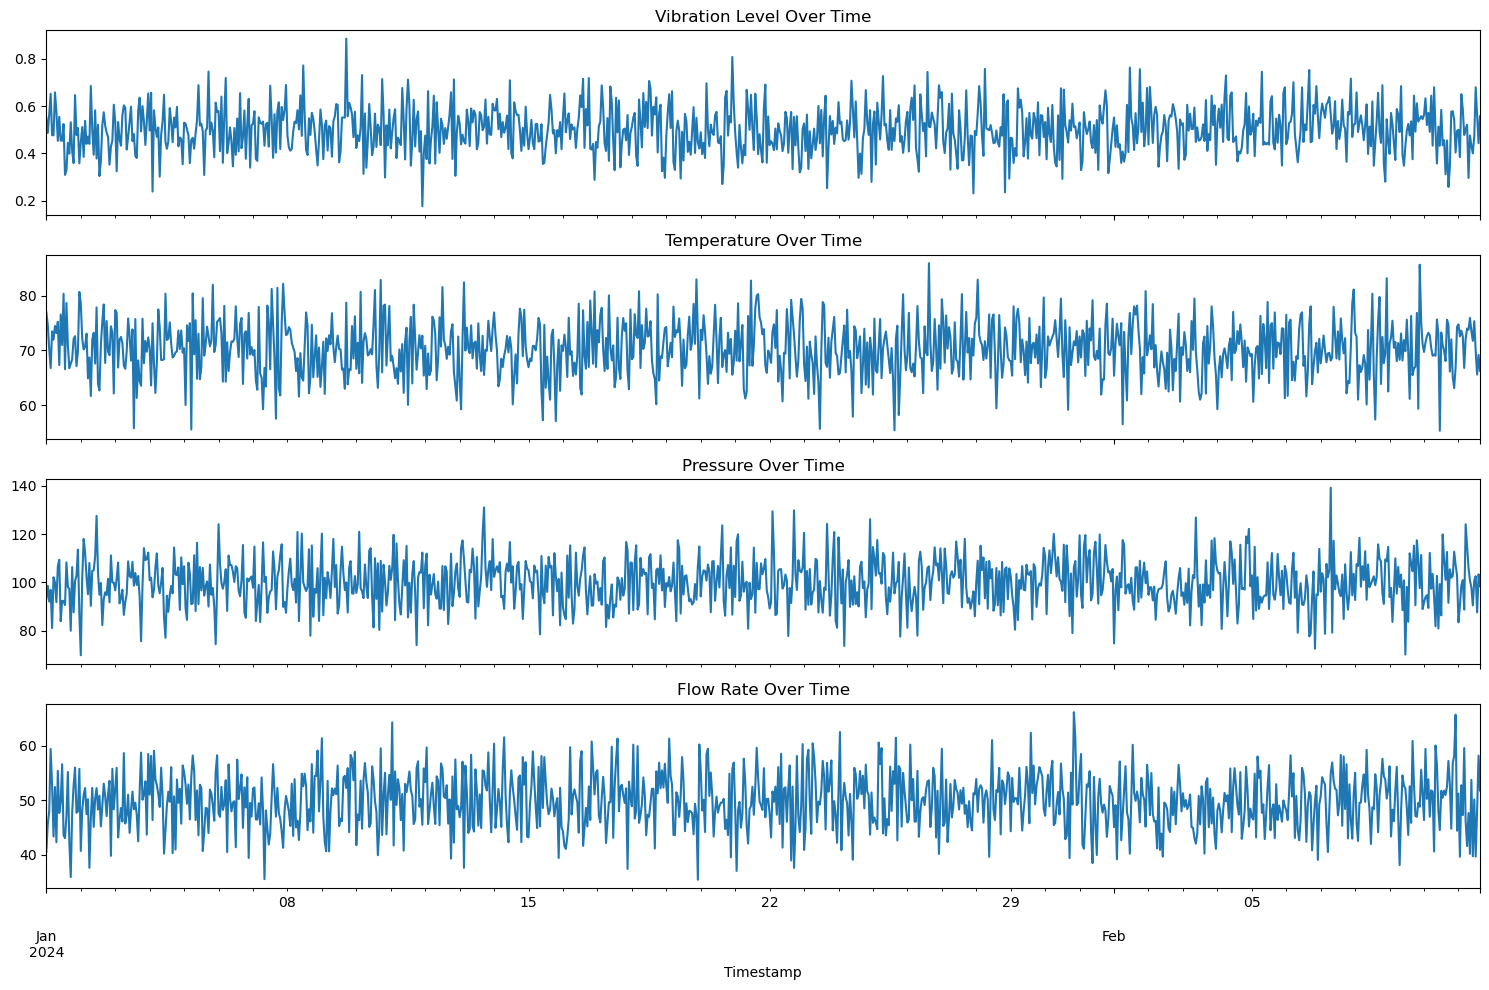

In [14]:
## plot individual feature across timestamp
fig, axs = plt.subplots(4, 1, figsize=(15, 10), sharex=True)

pump_data['vibration_level'].plot(ax=axs[0], title='Vibration Level Over Time')
pump_data['temperature_C'].plot(ax=axs[1], title='Temperature Over Time')
pump_data['pressure_PSI'].plot(ax=axs[2], title='Pressure Over Time')
pump_data['flow_rate_m3h'].plot(ax=axs[3], title='Flow Rate Over Time')

plt.xlabel('Timestamp')
plt.tight_layout()
plt.show()

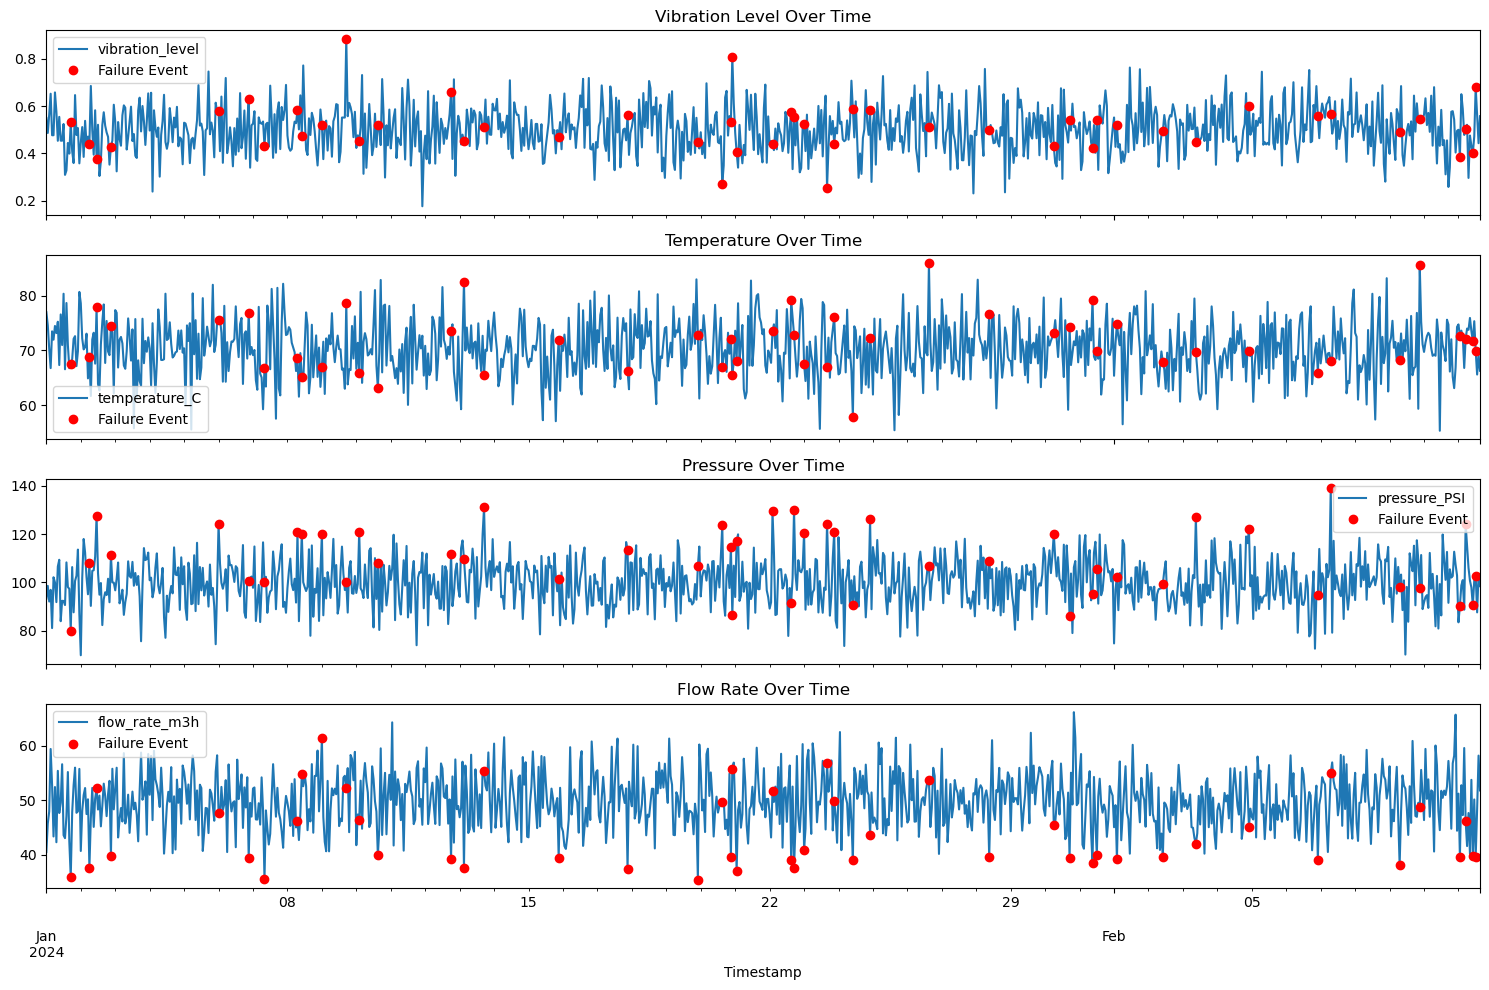

In [15]:
# Plot features with failure events
fig, axs = plt.subplots(4, 1, figsize=(15, 10), sharex=True)

pump_data['vibration_level'].plot(ax=axs[0], title='Vibration Level Over Time')
pump_data[pump_data['failure'] == 1]['vibration_level'].plot(ax=axs[0], linestyle='none', marker='o', color='red', label='Failure Event')
axs[0].legend()

pump_data['temperature_C'].plot(ax=axs[1], title='Temperature Over Time')
pump_data[pump_data['failure'] == 1]['temperature_C'].plot(ax=axs[1], linestyle='none', marker='o', color='red', label='Failure Event')
axs[1].legend()

pump_data['pressure_PSI'].plot(ax=axs[2], title='Pressure Over Time')
pump_data[pump_data['failure'] == 1]['pressure_PSI'].plot(ax=axs[2], linestyle='none', marker='o', color='red', label='Failure Event')
axs[2].legend()

pump_data['flow_rate_m3h'].plot(ax=axs[3], title='Flow Rate Over Time')
pump_data[pump_data['failure'] == 1]['flow_rate_m3h'].plot(ax=axs[3], linestyle='none', marker='o', color='red', label='Failure Event')
axs[3].legend()

plt.xlabel('Timestamp')
plt.tight_layout()
plt.show()

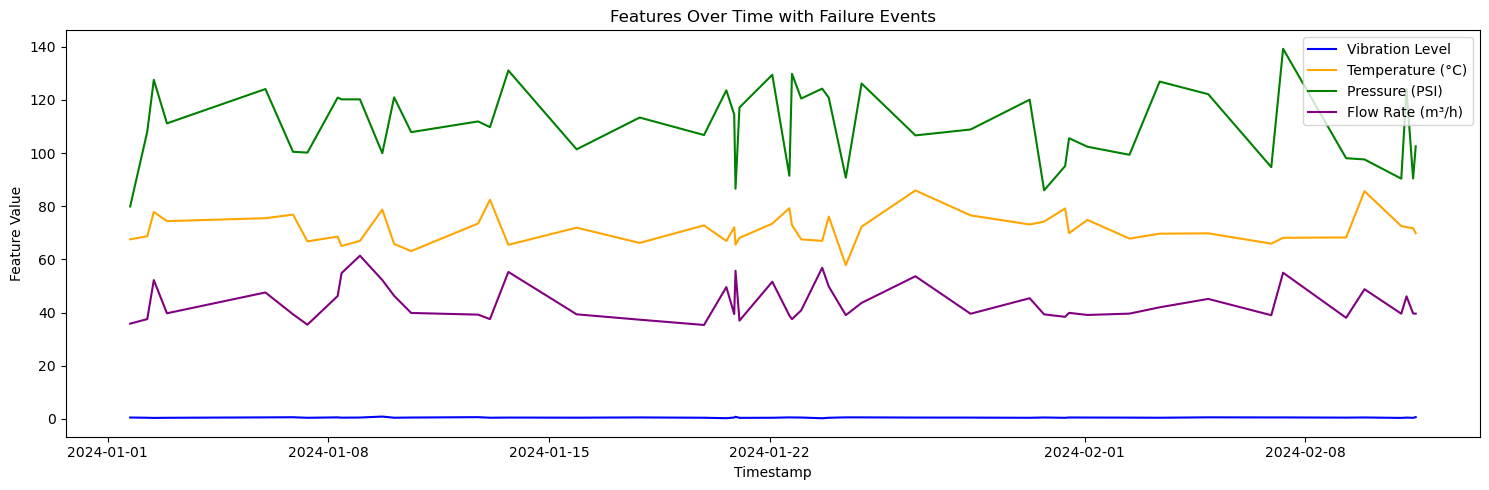

In [17]:
# Filter data where failure is 1
failure_df = pump_data[pump_data['failure'] == 1]

# Create a figure
plt.figure(figsize=(15, 5))

# Plot all features
plt.plot(failure_df.index, failure_df['vibration_level'], label='Vibration Level', color='blue')
plt.plot(failure_df.index, failure_df['temperature_C'], label='Temperature (°C)', color='orange')
plt.plot(failure_df.index, failure_df['pressure_PSI'], label='Pressure (PSI)', color='green')
plt.plot(failure_df.index, failure_df['flow_rate_m3h'], label='Flow Rate (m³/h)', color='purple')

# Add titles and labels
plt.title('Features Over Time with Failure Events')
plt.xlabel('Timestamp')
plt.ylabel('Feature Value')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

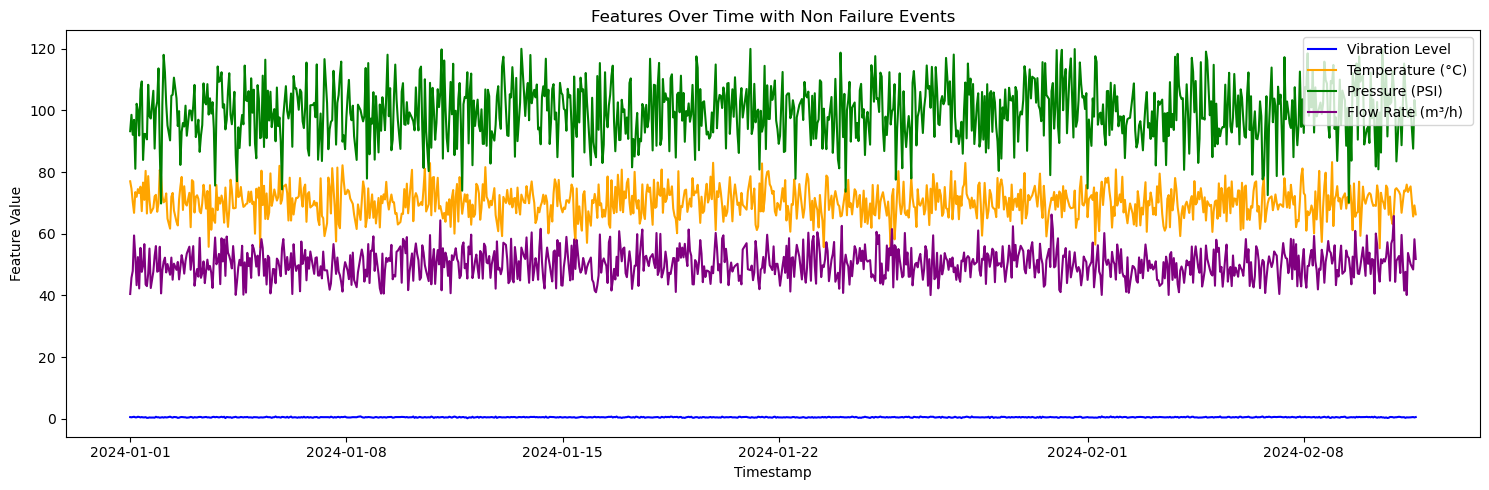

In [18]:
# Filter data where failure is 1
non_failure_df = pump_data[pump_data['failure'] == 0]

# Create a figure
plt.figure(figsize=(15, 5))

# Plot all features
plt.plot(non_failure_df.index, non_failure_df['vibration_level'], label='Vibration Level', color='blue')
plt.plot(non_failure_df.index, non_failure_df['temperature_C'], label='Temperature (°C)', color='orange')
plt.plot(non_failure_df.index, non_failure_df['pressure_PSI'], label='Pressure (PSI)', color='green')
plt.plot(non_failure_df.index, non_failure_df['flow_rate_m3h'], label='Flow Rate (m³/h)', color='purple')

# Add titles and labels
plt.title('Features Over Time with Non Failure Events')
plt.xlabel('Timestamp')
plt.ylabel('Feature Value')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

**Time Series Analysis with Failure Events**

The time series plots, with failure events marked in red, provide insights into the relationship between pump performance features and failures:

+ Vibration Level: Failures occur across various vibration levels with no clear pattern, suggesting vibration is not a strong standalone indicator.
+ Temperature: Failure events are spread across the entire temperature range, indicating temperature fluctuations alone do not strongly correlate with failures.
+ Pressure: Failures appear at both low and high pressures, with a slight clustering at higher values, hinting at a possible but weak relationship.
+ Flow Rate: Failures are more frequent at lower flow rates, suggesting reduced flow might be linked to failures, though the pattern is not conclusive.


Conclusion:
There are no strong individual patterns linking these features to failures. Slight tendencies observed at high pressures and low flow rates may require further investigation, potentially considering interactions between multiple features.